In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./.gitignore/data_a (Florent).csv", skipinitialspace = True) #Open the csv file with no space before and after the values


#Part 1 : cleaning the data

#A. Drop the duplicates

nb_of_duplicates = len(df)-len(df.drop_duplicates()) #How many duplicates do I have ?

if nb_of_duplicates != 0 :
    df.drop_duplicates(inplace=True)

#B. Empty cells :

df.isnull().sum() #How many empty cells are there for each column

cleaned_df = df.dropna(subset=['Price'])#Delete the 3992 empty price
cleaned_df = cleaned_df.dropna(subset=['Number of rooms'])#Delete the 1918 empty Number of rooms
cleaned_df = cleaned_df.dropna(subset=['Living Area'])#Delete the 11677 empty Living Area (60605 left)

cleaned_df["Garden"].fillna(False, inplace = True) #Replace NaN value by False in the Garden Column
cleaned_df["Furnished"].fillna(False, inplace = True) #Replace NaN value by False in the Furnished Column
cleaned_df["Fully equipped kitchen"].fillna(False, inplace = True) #Replace NaN value by False in the Furnished Column

del cleaned_df['Area of the terrace'] #Delete the column Area of the terrace
del cleaned_df['Area of the garden'] #Delete the column Area of the garden
del cleaned_df['State of the building'] #Delete the column State of the building
del cleaned_df['Surface area of the plot of land'] #Delete the column Surface area of the plot of land
del cleaned_df['Surface of the land'] #Delete the column Surface area of land
del cleaned_df['Number of facades'] #Delete the column Number of facades

nb_null_values = cleaned_df.isnull().sum()

#if nb_null_values > 0 : #How many empty cells are there for each column => Not working if time come back to it !
#    raise NameError(f"There are {nb_null_values} null values in the DB, be careful !")

#C. No blank spaces 
# Already done in the opening of the csv file



In [115]:
#D. Data in wrong format

cleaned_df_formatted = cleaned_df.convert_dtypes() #convert all the dtypes in the best types for them
#cleaned_df_formatted.info() #informations about Dtype and Non-null elements in the database

#E. Wrong data

#print(cleaned_df_formatted.head(2))
#cleaned_df_formatted["Number of rooms"].value_counts() #Display the number of buildings
#cleaned_df_formatted["To sell"]cleaned_df_formatted["Price"].value_counts().head(20)


index_sell_to_del = cleaned_df_formatted[(cleaned_df_formatted['To sell'] == False)].index # taking the index of the row who are False to delete them on the next line
df_sell = cleaned_df_formatted.drop(index_sell_to_del) #Delete the rows collect the line above and store the new DF in df_sell
del df_sell['To rent'] #Delete the column "To rent" because it is useless now

index_rent_to_del = cleaned_df_formatted[(cleaned_df_formatted['To rent'] == False)].index # taking the index of the row who are False to delete them on the next line
df_rent = cleaned_df_formatted.drop(index_rent_to_del) #Delete the rows collect the line above and store the new DF in df_rent
del df_rent['To sell'] #Delete the column "To sell" because it is useless now


#Delete the extreme prices and extreme living area from df_rent and df_sell

df_rent.drop(df_rent[df_rent['Price'] >= 4000].index, inplace = True)
df_rent.drop(df_rent[df_rent['Living Area'] > 400].index, inplace = True)


In [116]:
#Creating some specific Dataframe to plot
#Taking only the appartment and Rez-de-chausséet rent 
df_rent_appart = df_rent[(df_rent.loc[ : ,'type'] == "Appartement") | (df_rent.loc[ : ,'type'] == "Rez-de-chaussée")]

In [117]:
#calculating the price per squared m for the appartment and Rez-de-chaussée
df_rent_appart.loc[ : ,'Price by squared m'] = df_rent_appart.loc[ : ,'Price'] / df_rent_appart.loc[ : ,'Living Area']

/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/2404732719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_appart.loc[ : ,'Price by squared m'] = df_rent_appart.loc[ : ,'Price'] / df_rent_appart.loc[ : ,'Living Area']


In [118]:
#calculating the price per bedroom m for the appartment and Rez-de-chaussée

df_rent_appart.loc[ : ,'Price by bedroom'] = df_rent_appart.loc[ : ,'Price'] / df_rent_appart.loc[ : ,'Number of rooms']


/var/folders/bf/nzxkpm4s193510wrty2mgpm40000gn/T/ipykernel_82748/829748794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent_appart.loc[ : ,'Price by bedroom'] = df_rent_appart.loc[ : ,'Price'] / df_rent_appart.loc[ : ,'Number of rooms']


In [140]:
#Part 2 : Data Analysis

#How many rows and columns ?

def how_many_columns_rows_df(df):
    vnames = [name for name in globals() if globals()[name] is df]#Getting the name of the df
    print(f"There are {df.shape[0]} rows in our database named {vnames[0]}") #How many rows ?
    print(f"There are {df.shape[1]} columns in our database named {vnames[0]}") #How many columns ?
    return None

how_many_columns_rows_df(cleaned_df_formatted)



df_rent_appart.head(1)

There are 60605 rows in our database named cleaned_df_formatted
There are 14 columns in our database named cleaned_df_formatted


,Unnamed: 0,To rent,Price,Number of rooms,Living Area,Fully equipped kitchen,Furnished,Open fire,Terrace,Garden,Swimming pool,zipcode,type,Price by squared m,Price by bedroom
1,2718948,True,790,2,140,True,False,False,False,False,False,3200,Appartement,5.642857,395.0


In [139]:
#What is the correlation between the variables and the price ? (Why might that be?)

#Correlation between Price and Numbers of rooms to rent an appartment
col1 , col2 = "Price", "Number of rooms"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

#Correlation between Price and Living Area to rent an appartment
col3 = "Living Area"
corr = df_rent_appart[col1].corr(df_rent_appart[col3])
print("Correlation between ", col1, " and ", col3, "is: ", round(corr, 2))





#print(df_rent['type'].value_counts())

Correlation between  Price  and  Number of rooms is:  0.06


AttributeError: 'float' object has no attribute 'shape'

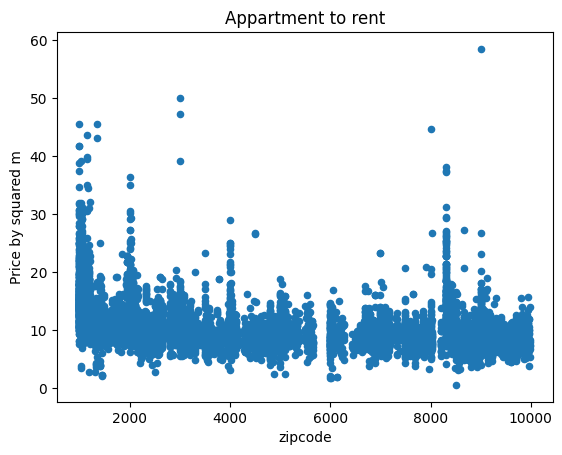

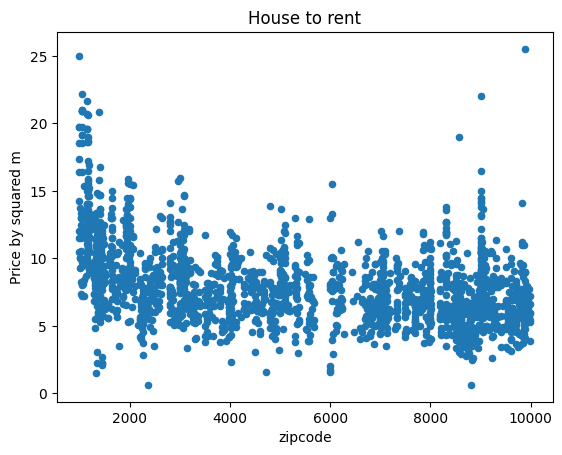

In [ ]:
#Plotting 

df_rent_appart.plot(x='zipcode', y='Price by squared m', kind='scatter', title="Appartment to rent")
plt.show()


#df2 = df[df['column name']]#Taking appartement and Rez-de-chaussee from column type in df_rent
df_rent_house.plot(x='zipcode', y='Price by squared m', kind='scatter', title="House to rent")
#df_rent_house.plot(x ='Living Area', y='Price', kind='bar')
#df_rent_house.plot.pie(y='Price', figsize=(5, 5), autopct='%1.1f%%', startangle=90)
plt.show()